Importer les bibliothèques importantes :
    -pandas pour la gestion des ensembles de données
    -numpy pour le calcul matriciel
    -matplotlib pour la visualisation
    -scikit learn pour le machine learning



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,sigmoid
import keras as K
import tensorflow as tf

Using TensorFlow backend.


On importe les données d entraînement

In [2]:
df = pd.read_csv('DATA/dengue_features_train.csv')
dflabel = pd.read_csv('DATA/dengue_labels_train.csv')

# On se débarasse des données imcomplètes

In [3]:
df.head(100)
imputer = preprocessing.Imputer()
values_imputes = imputer.fit_transform(df.values[:,4:])
df_imputes = pd.DataFrame(values_imputes)
df_imputes.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.122600,0.103725,0.198483,0.177617,12.420000,297.572857,297.742857,292.414286,299.800000,295.900000,32.000000,73.365714,12.420000,14.012857,2.628571,25.442857,6.900000,29.400000,20.00000,16.00000
1,0.169900,0.142175,0.162357,0.155486,22.820000,298.211429,298.442857,293.951429,300.900000,296.400000,17.940000,77.368571,22.820000,15.372857,2.371429,26.714286,6.371429,31.700000,22.20000,8.60000
2,0.032250,0.172967,0.157200,0.170843,34.540000,298.781429,298.878571,295.434286,300.500000,297.300000,26.100000,82.052857,34.540000,16.848571,2.300000,26.714286,6.485714,32.200000,22.80000,41.40000
3,0.128633,0.245067,0.227557,0.235886,15.360000,298.987143,299.228571,295.310000,301.400000,297.000000,13.900000,80.337143,15.360000,16.672857,2.428571,27.471429,6.771429,33.300000,23.30000,4.00000
4,0.196200,0.262200,0.251200,0.247340,7.520000,299.518571,299.664286,295.821429,301.900000,297.500000,12.200000,80.460000,7.520000,17.210000,3.014286,28.942857,9.371429,35.000000,23.90000,5.80000
5,0.142294,0.174850,0.254314,0.181743,9.580000,299.630000,299.764286,295.851429,302.400000,298.100000,26.490000,79.891429,9.580000,17.212857,2.100000,28.114286,6.942857,34.400000,23.90000,39.10000
6,0.112900,0.092800,0.205071,0.210271,3.480000,299.207143,299.221429,295.865714,301.300000,297.700000,38.600000,82.000000,3.480000,17.234286,2.042857,27.414286,6.771429,32.200000,23.30000,29.70000
7,0.072500,0.072500,0.151471,0.133029,151.120000,299.591429,299.528571,296.531429,300.600000,298.400000,30.000000,83.375714,151.120000,17.977143,1.571429,28.371429,7.685714,33.900000,22.80000,21.10000
8,0.102450,0.146175,0.125571,0.123600,19.320000,299.578571,299.557143,296.378571,302.100000,297.700000,37.510000,82.768571,19.320000,17.790000,1.885714,28.328571,7.385714,33.900000,22.80000,21.10000
9,0.142294,0.121550,0.160683,0.202567,14.410000,300.154286,300.278571,296.651429,302.300000,298.700000,28.400000,81.281429,14.410000,18.071429,2.014286,28.328571,6.514286,33.900000,24.40000,1.10000


In [11]:
df.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


# Fonction annexes visualisation

In [9]:
def afficherCourbes(ListeCourbes):
    for courbe in ListeCourbes:
        data = df[courbe]
        plt.plot(data)
def correlationDonnees(courbe1,courbe2):
    plt.plot(df[courbe1],df[courbe2])
    
def moyenneGlissante(courbe, nb = 5):
    data = df[courbe].copy()
    n = len(data)
    for i in range(n-1,nb+1,-1):
        for j in range(nb-1):
            data[i] += data[i-j] 
        data[i] /= nb
    plt.plot(data)
    
    

# Visualisation des courbes

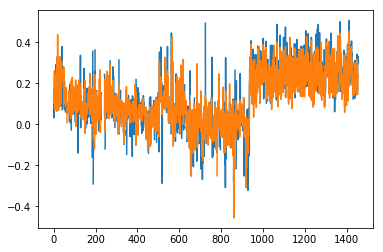

In [30]:
afficherCourbes(['ndvi_ne','ndvi_nw'])

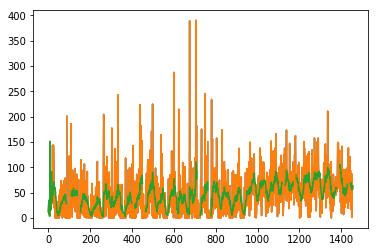

In [77]:
afficherCourbes(['precipitation_amt_mm','reanalysis_sat_precip_amt_mm'])
moyenneGlissante('precipitation_amt_mm',15)

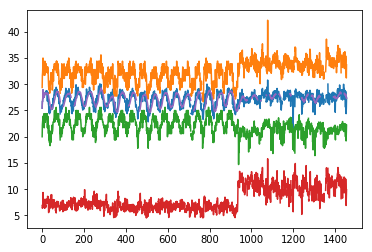

In [78]:
afficherCourbes(['station_avg_temp_c','station_max_temp_c','station_min_temp_c','station_diur_temp_rng_c'])
moyenneGlissante('station_avg_temp_c',15)

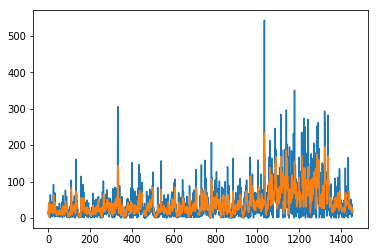

In [75]:
afficherCourbes(['station_precip_mm'])
moyenneGlissante('station_precip_mm',5)

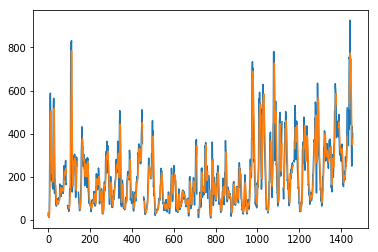

In [64]:
afficherCourbes(['reanalysis_precip_amt_kg_per_m2'])
moyenneGlissante('reanalysis_precip_amt_kg_per_m2')

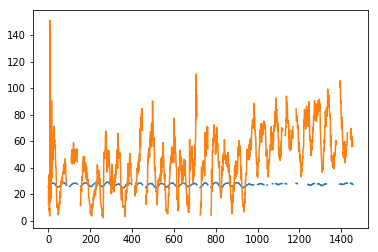

In [80]:
moyenneGlissante('station_avg_temp_c',15)
moyenneGlissante('precipitation_amt_mm',15)

# Label

In [4]:
dflabel.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
dflabel.tail()

,city,year,weekofyear,total_cases
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1
1455,iq,2010,25,4


In [6]:
nbCas = dflabel['total_cases']

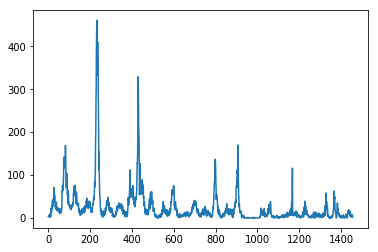

In [7]:
plt.plot(nbCas)

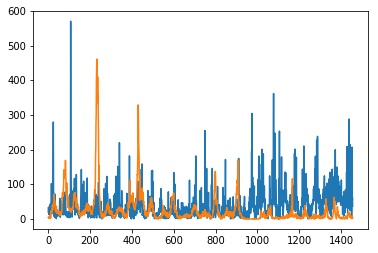

In [11]:
afficherCourbes(['reanalysis_precip_amt_kg_per_m2'])
plt.plot(nbCas)


# Rescaling

## Normalisation

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
donneesNormalisees = min_max_scaler.fit_transform(values_imputes)
dfNormalisee = pd.DataFrame(donneesNormalisees)
dfNormalisee.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,0.354667,0.314680,0.123457,0.692308,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,0.441778,0.489213,0.191358,0.730769,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,0.496000,0.657583,0.166667,0.800000,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,0.539556,0.643471,0.222222,0.776923,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,0.593778,0.701541,0.253086,0.815385,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676


In [5]:
min_max_scaler2 = preprocessing.MinMaxScaler()
labelsNormalises = min_max_scaler2.fit_transform(dflabel['total_cases'].values.reshape(dflabel['total_cases'].values.size,1))
labelsNormalises

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.00867679],
       [0.01084599],
       [0.00867679],
       ...,
       [0.0021692 ],
       [0.0021692 ],
       [0.00867679]])

## Standardisation

In [6]:
standard_scaler = preprocessing.StandardScaler()
donneesStandardisees = standard_scaler.fit_transform(values_imputes)
dfStandardisee = pd.DataFrame(donneesStandardisees)

In [7]:
standart_scaler2 = preprocessing.StandardScaler()
labelsStandardises = standart_scaler2.fit_transform(dflabel['total_cases'].values.reshape(dflabel['total_cases'].values.size,1))
labelsStandardises

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.47440685],
       [-0.45146108],
       [-0.47440685],
       ...,
       [-0.54324414],
       [-0.54324414],
       [-0.47440685]])

# ACP

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


0.6146044511733484

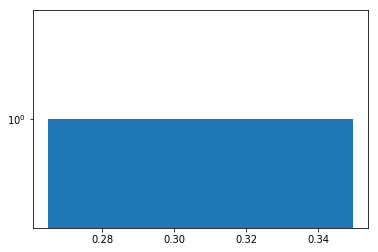

In [59]:
ACP = PCA(n_components=2)
axesprincipaux2 = ACP.fit_transform(donneesStandardisees)
plt.hist(ACP.explained_variance_ratio_, bins=2, log=True)
ACP.explained_variance_ratio_.sum()

In [60]:
axesprincipaux2.shape

(1456, 2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


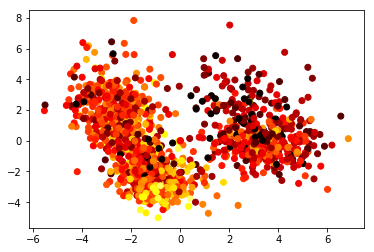

In [61]:
plt.scatter(axesprincipaux2[:,0],axesprincipaux2[:,1],c=numpy.log(Y)
           ,cmap="hot")

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


0.7491457393914812

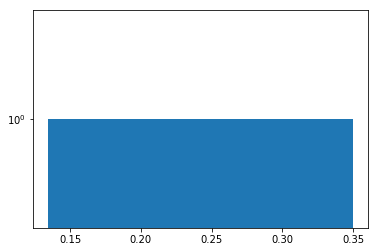

In [20]:
ACP = PCA(n_components=3)
axesprincipaux3 = ACP.fit_transform(donneesStandardisees)
plt.hist(ACP.explained_variance_ratio_, bins=3, log=True)
ACP.explained_variance_ratio_.sum()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


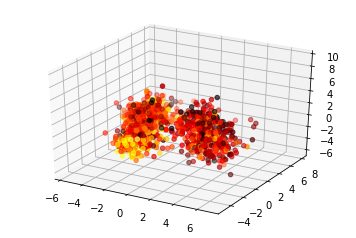

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(axesprincipaux3[:,0],axesprincipaux3[:,1],axesprincipaux3[:,2],c=numpy.log(Y)
           ,cmap="hot")

0.9697604722537736

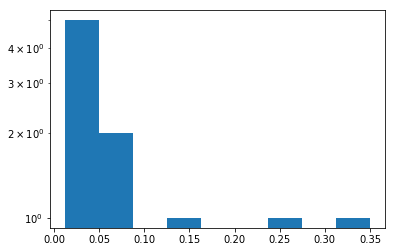

In [13]:
ACP = PCA(n_components=10)
axesprincipaux10 = ACP.fit_transform(donneesStandardisees)
plt.hist(ACP.explained_variance_ratio_, bins=9, log=True)
ACP.explained_variance_ratio_.sum()

# Préparer l'ensemble d'entraînement

In [90]:
X = X_2
Y = Y_2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Essais sur différents algorithmes classiques

## Linear Regression

In [42]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train,Y_train)
print(linearRegressionModel.score(X_test,Y_test))


-0.5829557153629701


## KNN

In [43]:
Luniform = [] #Standardisées
for i in range(1,200):
    NearestNeighborsModel = KNeighborsRegressor(n_neighbors=i,weights='uniform')
    NearestNeighborsModel.fit(X_train, Y_train)
    Luniform.append(NearestNeighborsModel.score(X_test, Y_test))
Ldistance = []
for i in range(1,200):
    NearestNeighborsModel = KNeighborsRegressor(n_neighbors=i,weights='distance')
    NearestNeighborsModel.fit(X_train, Y_train)
    Ldistance.append(NearestNeighborsModel.score(X_test, Y_test))
plt.plot(np.array(Luniform),color='red')
plt.plot(np.array(Ldistance),color='blue')

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 80, n_neighbors = 81

KeyboardInterrupt: 

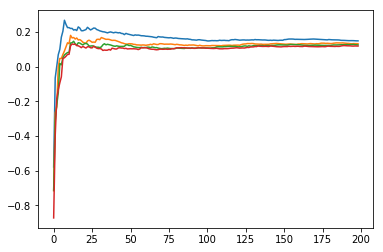

In [76]:
for p in range(1,10):
    Ldistance = []
    for i in range(1,200):
        NearestNeighborsModel = KNeighborsRegressor(n_neighbors=i,weights='distance',p=p)
        NearestNeighborsModel.fit(X_train, Y_train)
        Ldistance.append(NearestNeighborsModel.score(X_test, Y_test))
    plt.plot(np.array(Ldistance),label=p)

## SVM

In [44]:
L = ['rbf','linear','poly','sigmoid'] #Standardisées
for kernel in L:
    supportVectorModel = SVR(kernel=kernel)
    supportVectorModel.fit(X_train, Y_train)
    print(kernel)
    print(supportVectorModel.score(X_test, Y_test))

rbf
-0.12574317752184672
linear
-0.3346958996489371
poly
-0.03238325284575572
sigmoid
-0.11025186032274936


## Random Forest

1
2
3
4
5
8
10
15
20
25
30
40
50
60
70
100
150
200
500
1000


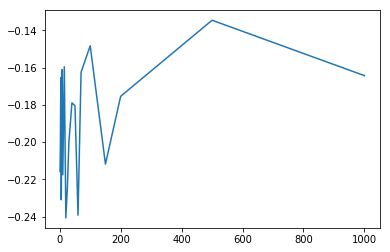

In [45]:
nbEstimator = [1,2,3,4,5,8,10,15,20,25,30,40,50,60,70,100,150,200,500,1000]
scores = []
for nb in nbEstimator:
    randomForestModel = RandomForestRegressor(n_estimators=200)
    randomForestModel.fit(X_train, Y_train.ravel())
    scores.append(randomForestModel.score(X_test, Y_test.ravel()))
    print(nb)
plt.plot(np.array(nbEstimator),np.array(scores))

1
2
3
4
5
8
10
15
20
25
30
40
50
60
70
100
150
200
500
1000


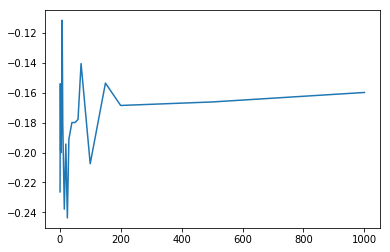

In [46]:
nbEstimator = [1,2,3,4,5,8,10,15,20,25,30,40,50,60,70,100,150,200,500,1000]
scores = []
for nb in nbEstimator:
    randomForestModel = RandomForestRegressor(n_estimators=200,max_depth=20)
    randomForestModel.fit(X_train, Y_train.ravel())
    scores.append(randomForestModel.score(X_test, Y_test.ravel()))
    print(nb)
plt.plot(np.array(nbEstimator),np.array(scores))

## MLP

In [48]:
MLPRegressorModel = MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(100,50,30,10,5,3,1), max_iter=1000)
MLPRegressorModel.fit(X_train, Y_train)
MLPRegressorModel.score(X_test, Y_test)

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.2646390709342217

# DeepLearning

In [89]:
X_2 = np.random.random((1000,10))
Y_2 = X.sum(axis=1)
X_2.shape

(1000, 10)

## définir le model

In [91]:
Model = Sequential()
Model.add(Dense(1,input_shape=(10,)))
np.mean(Y_train)

4.962292620692624

## On crée nos propres métriques

In [16]:
def squarred_error(y_true, y_pred):
    return np.sum(np.square(y_true-y_pred))
def score_r2(y_true, y_pred):
    u =  np.sum(np.square(y_true-y_pred))
    ymoy = 0.052444633286371334
    v = np.sum(np.square(y_true - ymoy))
    return 1 - u/v

In [92]:
Model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=[squarred_error])

In [97]:
Model.fit(X_train, Y_train.reshape(Y_train.shape[0]), epochs=1000, batch_size=100, verbose=1)

Epoch 1/1000
800/800 [==============================] - 0s 216us/step - loss: 29.2611 - squarred_error: 29.2611
Epoch 2/1000
800/800 [==============================] - 0s 19us/step - loss: 28.7525 - squarred_error: 28.7525
Epoch 3/1000
800/800 [==============================] - 0s 18us/step - loss: 28.2466 - squarred_error: 28.2466
Epoch 4/1000
800/800 [==============================] - 0s 18us/step - loss: 27.7508 - squarred_error: 27.7508
Epoch 5/1000
800/800 [==============================] - 0s 17us/step - loss: 27.2582 - squarred_error: 27.2582
Epoch 6/1000
800/800 [==============================] - 0s 17us/step - loss: 26.7750 - squarred_error: 26.7750
Epoch 7/1000
800/800 [==============================] - 0s 17us/step - loss: 26.2979 - squarred_error: 26.2979
Epoch 8/1000
800/800 [==============================] - 0s 17us/step - loss: 25.8261 - squarred_error: 25.8261
Epoch 9/1000
800/800 [==============================] - 0s 17us/step - loss: 25.3638 - squarred_error: 25.3638


In [98]:
Model.evaluate(X_test, Y_test)

200/200 [==============================] - 0s 97us/step


[1.0000429010391236, 1.0000429010391236]

In [99]:
#print(X_train)
A = np.array([[0.2,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.9,0.1],
              [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])
print(A.shape)

print(Model.predict(A[0:2]))

(2, 10)
[[3.3370495]
 [2.949241 ]]


In [84]:
Model.layers

In [86]:
Model.inputs

[<tf.Tensor 'dense_135_input:0' shape=(?, 20) dtype=float32>]

In [95]:
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [104]:
Model.get_weights()[0].sum()

4.8522964